# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Collection and Processing 

In [2]:
#Loading dataset
data = pd.read_csv(r'D:\Visual Studio Code\ML\Machine_Learning\Dataset\Loan Dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# number of row and column in dataset
data.shape

(614, 13)

In [4]:
#Statistical Function
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Number of missing  value in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Removing missing value
data = data.dropna()

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
#Labeling Encoding 
data.replace({'Loan_Status': {'N':0, 'Y':1}},inplace =True)
data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17844\1329136852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status': {'N':0, 'Y':1}},inplace =True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
#Dependent column values
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [10]:
#change the 3+ dependents value to 4 because it cant be process data
data.replace({'Dependents':{'3+':4}},inplace =True)

In [11]:
data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization 

<Axes: xlabel='Education', ylabel='count'>

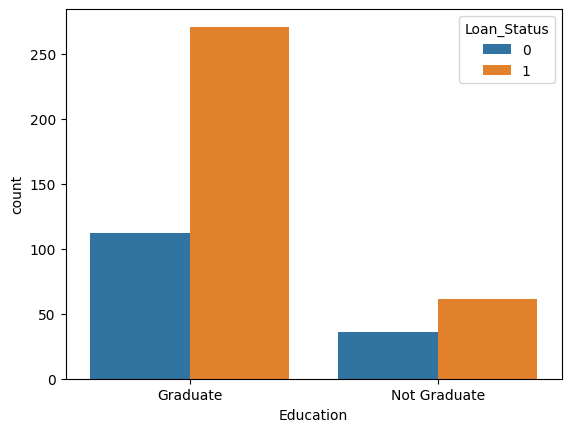

In [12]:
#Education and loan status 
sns.countplot(x='Education',hue ='Loan_Status',data = data)

<Axes: xlabel='Married', ylabel='count'>

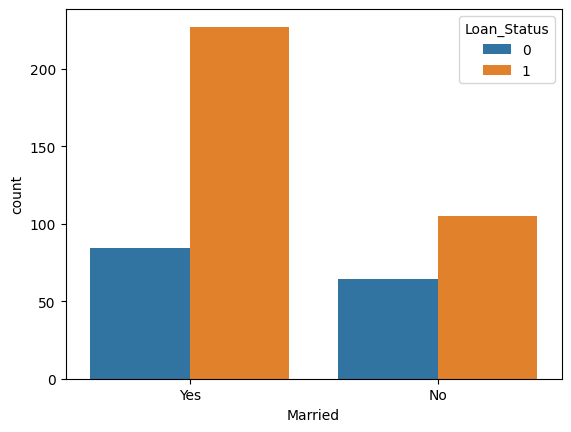

In [13]:
#Married Status and Loan status
sns.countplot(x='Married',hue ='Loan_Status',data = data)

<Axes: xlabel='Dependents', ylabel='count'>

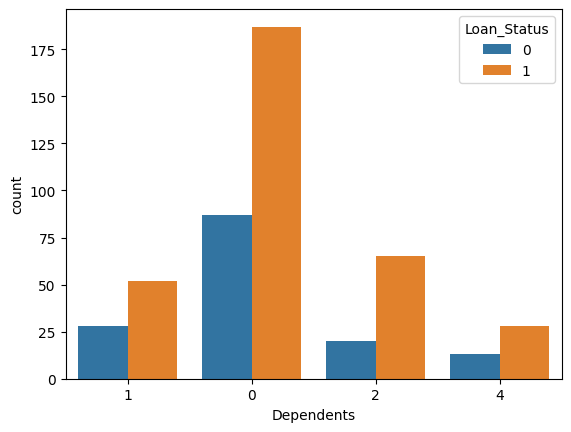

In [14]:
#Dependence and loan status
sns.countplot(x='Dependents',hue ='Loan_Status',data = data)

<Axes: xlabel='Gender', ylabel='count'>

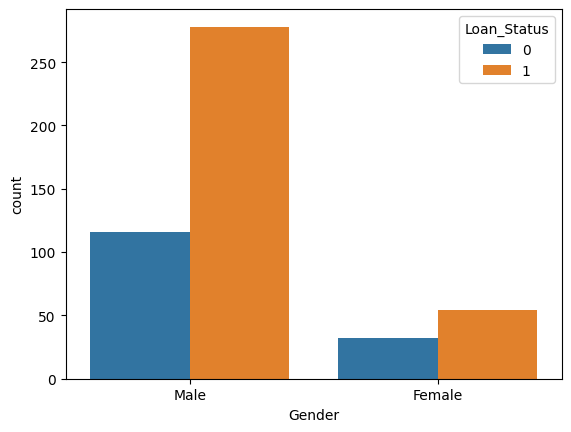

In [15]:
# Gender and loan status
sns.countplot(x='Gender',hue ='Loan_Status',data = data)

In [16]:
# Convert categorical data into numerical value
data.replace({'Gender':{'Male': 1,'Female': 0}, 'Married':{'Yes': 1 , 'No': 0},'Education' :{'Graduate': 1 , 'Not Graduate': 0},'Self_Employed':{'Yes':1 , 'No': 0},'Property_Area':{'Urban': 2,'Semiurban':1,'Rural':0}},inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17844\1780641413.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'Male': 1,'Female': 0}, 'Married':{'Yes': 1 , 'No': 0},'Education' :{'Graduate': 1 , 'Not Graduate': 0},'Self_Employed':{'Yes':1 , 'No': 0},'Property_Area':{'Urban': 2,'Semiurban':1,'Rural':0}},inplace = True)


In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
#Seperating the data and label
x= data.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y=data['Loan_Status']

In [19]:
#Splinting the data into traing and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.1,stratify=y)

In [20]:
#For Training model using SVM Model
classifier =svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)


SVC(kernel='linear')

In [21]:
#Checking the accuracy of trainig data
x_train_predict = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict,y_train)
print("Accuracy on training data: ",training_data_accuracy)

Accuracy on training data:  0.7986111111111112


In [22]:
#Checking the accuracy of test data
x_test_predict = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict,y_test)
print("Accuracy on testing data: ",test_data_accuracy)

Accuracy on testing data:  0.8333333333333334
